In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
cifar10_dataset = tf.keras.datasets.cifar10.load_data()
cifar10_dataset

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
type(cifar10_dataset)

tuple

In [4]:
((x_train, y_train), (x_test, y_test)) = cifar10_dataset
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [8]:
CATEGORIES = "airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, trucks".split(", ")
CATEGORIES

['airplanes',
 'cars',
 'birds',
 'cats',
 'deer',
 'dogs',
 'frogs',
 'horses',
 'ships',
 'trucks']

[4] deer


/tmp/ipython-input-571474602.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(y_train[INDEX], CATEGORIES[int(y_train[INDEX])])


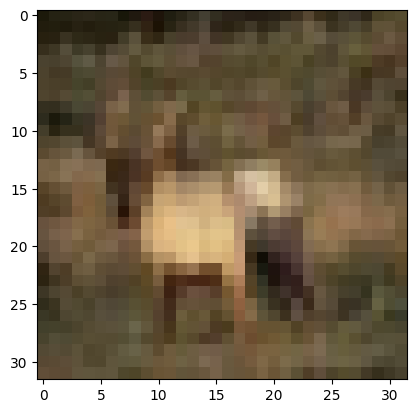

In [12]:
INDEX = 3

plt.imshow(x_train[INDEX])
print(y_train[INDEX], CATEGORIES[int(y_train[INDEX])])

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]], dtype=uint8)
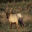

In [13]:
x_train[INDEX]

In [20]:
entire_model = tf.keras.Sequential(

       [

          ## CNN - convolutional Neural Networks
          tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32, 32, 3)),
          tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

          tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
          tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),


          ## INPUT
          tf.keras.layers.Flatten(),

          ## FULLY CONNECTED LAYERS
          tf.keras.layers.Dense(128, activation="relu"),

          tf.keras.layers.Dropout(0.2), # Random  - 20% dintre neuroni sunt dezactivati

           tf.keras.layers.Dense(64, activation="relu"),

          ## OUTPUT
          tf.keras.layers.Dense(10, activation="softmax")

       ]

)
entire_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

entire_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,338 (1.23 MB)

 Trainable params: 323,338 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
entire_model_history = entire_model.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2, verbose=1, shuffle=True)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3099 - loss: 2.3357 - val_accuracy: 0.5116 - val_loss: 1.3846
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5190 - loss: 1.3499 - val_accuracy: 0.5584 - val_loss: 1.2520
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5754 - loss: 1.2022 - val_accuracy: 0.6044 - val_loss: 1.1498
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6137 - loss: 1.0901 - val_accuracy: 0.6016 - val_loss: 1.1499
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6464 - loss: 1.0101 - val_accuracy: 0.6071 - val_loss: 1.1629
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6788 - loss: 0.9125 - val_accuracy: 0.6340 - val_loss: 1.0786
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7047 - loss: 0.8430 - val_accuracy: 0.6102 - val_loss: 1.1905
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7183 - loss: 0.8028 -

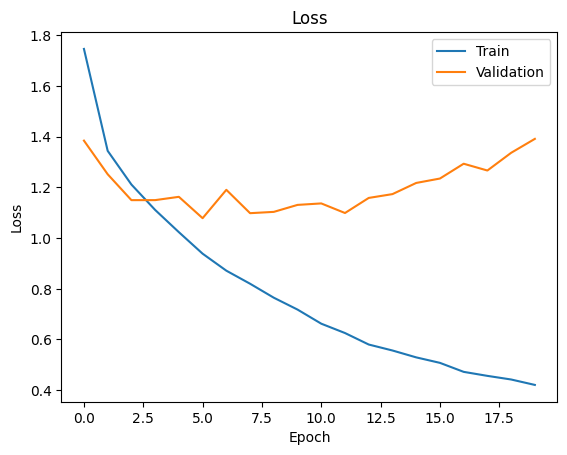

In [22]:
history = entire_model_history.history

accuracy = history["accuracy"]
val_accuracy = history["val_accuracy"]
loss = history["loss"]
val_loss = history["val_loss"]

plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()

# Pas 1 - adaugarea mai multor date

In [23]:
augmentation_layers = tf.keras.Sequential([
         ## Data Augmentation - flip, rotate, zoom, contrast
         tf.keras.layers.RandomFlip("horizontal_and_vertical"),
         tf.keras.layers.RandomZoom(0.2),
         tf.keras.layers.RandomRotation(0.2),
         tf.keras.layers.RandomContrast(0.2),
         tf.keras.layers.RandomBrightness(0.2),
])

In [25]:
model_with_augmentation = tf.keras.Sequential(

       [

          tf.keras.Input(shape=(32, 32, 3)),

          ## Data Augmentation Layer, definit mai sus
          augmentation_layers,

          ## CNN - convolutional Neural Networks
          tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"), #  input_shape=(32, 32, 3)), -  este la inceput acum
          tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

          tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
          tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),


          ## INPUT
          tf.keras.layers.Flatten(),

          ## FULLY CONNECTED LAYERS
          tf.keras.layers.Dense(128, activation="relu"),

          tf.keras.layers.Dropout(0.2), # Random  - 20% dintre neuroni sunt dezactivati

           tf.keras.layers.Dense(64, activation="relu"),

          ## OUTPUT
          tf.keras.layers.Dense(10, activation="softmax")

       ]

)
model_with_augmentation.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model_with_augmentation.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,338 (1.23 MB)

 Trainable params: 323,338 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model_with_augmentation_history = model_with_augmentation.fit(x_train, y_train, batch_size=32, epochs=20, validation_split=0.2, verbose=1, shuffle=True)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.1412 - loss: 3.4145 - val_accuracy: 0.2360 - val_loss: 2.1038
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2525 - loss: 2.0465 - val_accuracy: 0.3026 - val_loss: 1.9231
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3134 - loss: 1.8869 - val_accuracy: 0.3368 - val_loss: 1.8115
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3434 - loss: 1.8080 - val_accuracy: 0.3933 - val_loss: 1.6607
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3618 - loss: 1.7568 - val_accuracy: 0.3962 - val_loss: 1.6624
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3687 - loss: 1.7310 - val_accuracy: 0.4016 - val_loss: 1.6524
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3821 - loss: 1.7093 - val_accuracy: 0.3993 - val_loss: 1.6492
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3892 - loss: 1.6

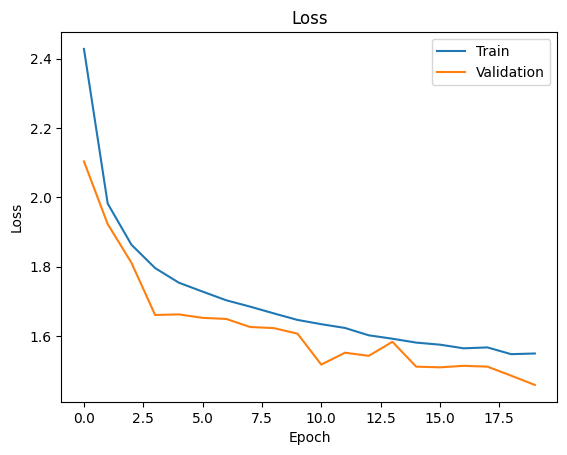

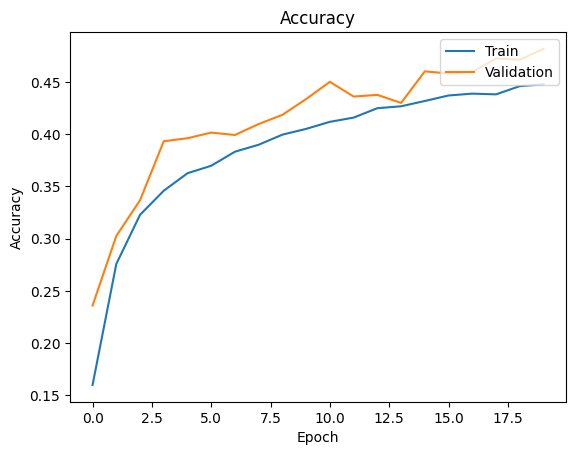

In [28]:
history = model_with_augmentation_history.history

accuracy = history["accuracy"]
val_accuracy = history["val_accuracy"]
loss = history["loss"]
val_loss = history["val_loss"]

plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()


# Pas 2 -> mai multe epoci, dar care sa se opreasca daca validarea nu scade continuu

In [29]:
model_with_augmentation_and_early_stop = tf.keras.Sequential(

       [

          tf.keras.Input(shape=(32, 32, 3)),

          ## Data Augmentation Layer, definit mai sus
          augmentation_layers,

          ## CNN - convolutional Neural Networks
          tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"), #  input_shape=(32, 32, 3)), -  este la inceput acum
          tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

          tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
          tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),


          ## INPUT
          tf.keras.layers.Flatten(),

          ## FULLY CONNECTED LAYERS
          tf.keras.layers.Dense(128, activation="relu"),

          tf.keras.layers.Dropout(0.2), # Random  - 20% dintre neuroni sunt dezactivati

           tf.keras.layers.Dense(64, activation="relu"),

          ## OUTPUT
          tf.keras.layers.Dense(10, activation="softmax")

       ]

)
model_with_augmentation_and_early_stop.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model_with_augmentation_and_early_stop.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,338 (1.23 MB)

 Trainable params: 323,338 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model_with_augmentation_and_early_stop_history = model_with_augmentation_and_early_stop.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, verbose=1, shuffle=True, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)])

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2102 - loss: 2.9444 - val_accuracy: 0.3089 - val_loss: 1.8735
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3051 - loss: 1.9056 - val_accuracy: 0.3449 - val_loss: 1.8026
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3317 - loss: 1.8305 - val_accuracy: 0.3855 - val_loss: 1.6838
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3538 - loss: 1.7870 - val_accuracy: 0.3922 - val_loss: 1.6871
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3694 - loss: 1.7469 - val_accuracy: 0.4019 - val_loss: 1.6731
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3862 - loss: 1.7048 - val_accuracy: 0.4066 - val_loss: 1.6588
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3904 - loss: 1.6924 - val_accuracy: 0.4250 - val_loss: 1.5932
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3972 - 

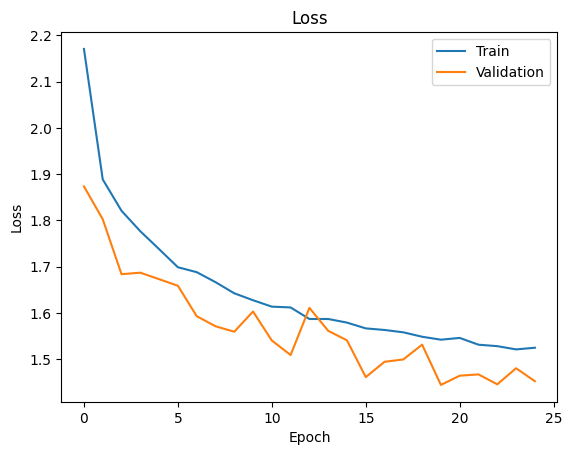

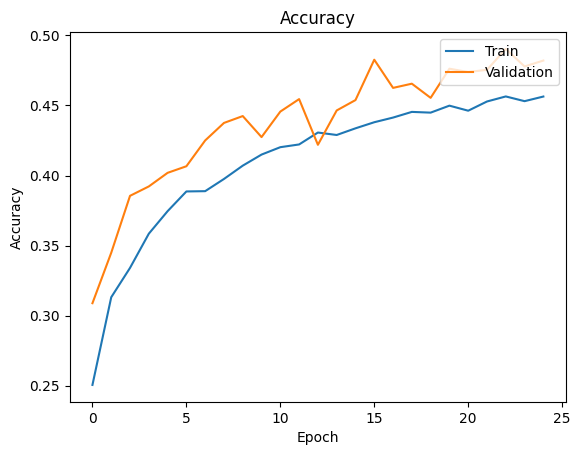

In [31]:
history = model_with_augmentation_and_early_stop_history.history

accuracy = history["accuracy"]
val_accuracy = history["val_accuracy"]
loss = history["loss"]
val_loss = history["val_loss"]

plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()

# Pas 3 - adaugarea mai multor layere pentru a crea un model mai bun

In [32]:
model_with_augmentation_multipl_dense_layers_and_early_stop = tf.keras.Sequential(

       [

          tf.keras.Input(shape=(32, 32, 3)),

          ## Data Augmentation Layer, definit mai sus
          augmentation_layers,

          ## CNN - convolutional Neural Networks
          tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"), #  input_shape=(32, 32, 3)), -  este la inceput acum
          tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),

          tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
          tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)),


          ## INPUT
          tf.keras.layers.Flatten(),

          ## FULLY CONNECTED LAYERS
          tf.keras.layers.Dense(512, activation="relu"),

          tf.keras.layers.Dropout(0.2), # Random  - 20% dintre neuroni sunt dezactivati
          tf.keras.layers.Dense(256, activation="relu"),

          tf.keras.layers.Dropout(0.2),

          tf.keras.layers.Dense(128, activation="relu"),

          tf.keras.layers.Dropout(0.2), # Random  - 20% dintre neuroni sunt dezactivati

           tf.keras.layers.Dense(64, activation="relu"),

          ## OUTPUT
          tf.keras.layers.Dense(10, activation="softmax")

       ]

)
model_with_augmentation_multipl_dense_layers_and_early_stop.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model_with_augmentation_multipl_dense_layers_and_early_stop.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,372,682 (5.24 MB)

 Trainable params: 1,372,682 (5.24 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_with_augmentation_multipl_dense_layers_and_early_stop_history = model_with_augmentation_multipl_dense_layers_and_early_stop.fit(x_train, y_train, batch_size=32, epochs=300, validation_split=0.2, verbose=1, shuffle=True, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)])

Epoch 1/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1832 - loss: 2.9587 - val_accuracy: 0.2965 - val_loss: 1.8907
Epoch 2/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.2721 - loss: 1.9602 - val_accuracy: 0.3404 - val_loss: 1.8011
Epoch 3/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3083 - loss: 1.8927 - val_accuracy: 0.3577 - val_loss: 1.7422
Epoch 4/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.3335 - loss: 1.8447 - val_accuracy: 0.3813 - val_loss: 1.7079
Epoch 5/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3365 - loss: 1.8161 - val_accuracy: 0.3830 - val_loss: 1.6644
Epoch 6/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3568 - loss: 1.7808 - val_accuracy: 0.3960 - val_loss: 1.6454
Epoch 7/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3653 - loss: 1.7513 - val_accuracy: 0.3930 - val_loss: 1.6668
Epoch 8/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3793 -

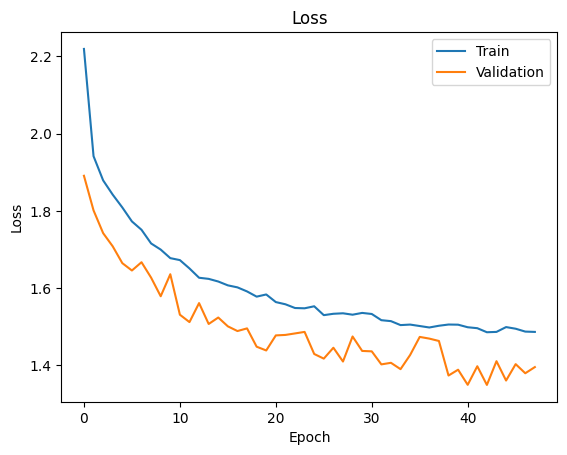

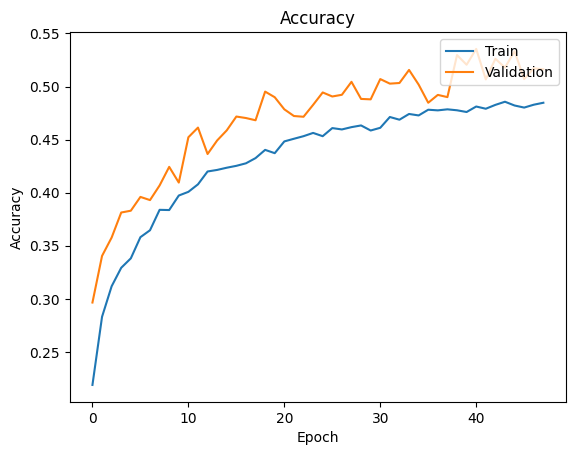

In [34]:
history = model_with_augmentation_multipl_dense_layers_and_early_stop_history.history

accuracy = history["accuracy"]
val_accuracy = history["val_accuracy"]
loss = history["loss"]
val_loss = history["val_loss"]

plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()

plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train", "Validation"], loc = "upper right")
plt.show()